In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

In [19]:
# Load the dataset
data = pd.read_csv("../data/processed_data.csv")

# Exclude non-numerical columns
data = data.select_dtypes(include=[np.number])

# Define features (X) and target (y)
X = data.drop(columns=['tigers_win'])
y = data['tigers_win']

In [20]:
# select 2 most meaningful features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print(f"Selected features: {selected_features.tolist()}")


Selected features: ['opponent_points', 'steals']


In [21]:
# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM on the selected features
svm_model.fit(X_selected, y)

SVC(kernel='linear', random_state=42)

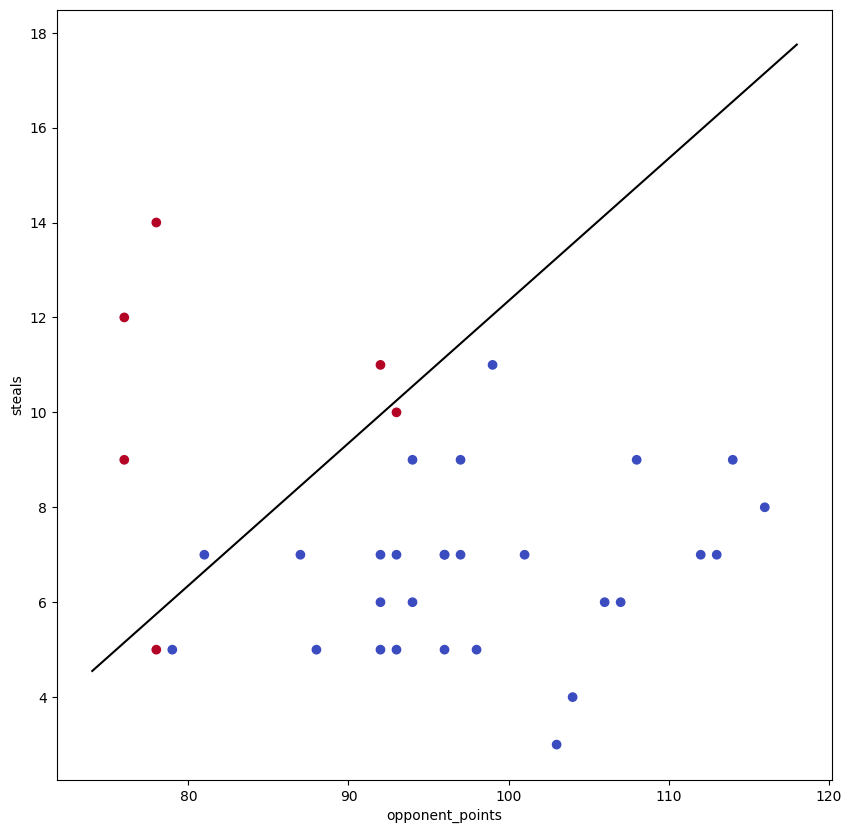

In [22]:
# 2d plot of the decision boundary
plt.figure(figsize=(10, 10))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap='coolwarm')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)

w = svm_model.coef_[0]
a = -w[0] / w[1]
yy = a * xx - (svm_model.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.show()